In [9]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from collections import defaultdict
from functions import load_data_tagtog, query_dataframe, load_data

sns.set(style="white", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [5]:
df_data = load_data_tagtog(['../tagtog/output']).fillna('')
df_data = df_data.loc[df_data['is_flood'].astype(bool)]

In [6]:
def shapeFilePandas(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    df['ADM2_EN'] = [i.lower() for i in df['ADM2_EN']]
    return df

def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,11)):
    plt.figure(figsize = figsize)
    count=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, count, fontsize=10)
        count += 1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,11), 
                          color = 'r'):
   
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
def plot_map_fill_multiples_ids(title, city, sf, x_lim = None, y_lim = None, 
                                figsize = (11,11), color = 'r'):
  
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
def plot_cities_2(sf, title, cities, color):
    
    df = shapeFilePandas(sf)
    city_id = []
    for i in cities:
        city_id.append(df[df['ADM2_EN'] == i.lower()].index[0])
    plot_map_fill_multiples_ids(title, city_id, sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (11,9), 
                                       color = color)

def plot_cities_data(sf, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color(data, color)
    df = shapeFilePandas(sf)
    city_id = []
    for i in cities:
#         print(i)
#         print(df[df['ADM2_EN'] == i.lower()].index[0])
        city_id.append(df[df['ADM2_EN'] == 
                            i.lower()].index[0])
    plot_map_fill_multiples_ids_tone(sf, title, city_id, cities,
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,11))
color_sq =  ['#d6e6ee', '#4d6703', '#bcdb19', '#dfad36', '#c93030', '#54278f']
color_sq =  ['#D6E6EE', '#E1F5C4',   '#EDE574',   '#F9D423',   '#FC913A',   '#FF4E50']

def plot_map_fill_multiples_ids_tone(sf, title, city, cityNames, 
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,11)):
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=20,y=0.92)
    for shape in sf.shapeRecords():
        psort = shape.shape.points
        x = [i[0] for i in psort]
        y = [i[1] for i in psort]
        ax.plot(x, y, 'k')
            
    for cityID, cityN in zip(city,cityNames):
        shape_ex = sf.shape(cityID)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[city.index(cityID)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, cityN, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
    
    colorNames = [str(int(bins[i])) + " - "+str(int(bins[i+1])-1) for i in range(6)]
    custom_lines = [Line2D([0], [0], color=c, lw=10) for c in color_sq]
    ax.legend(custom_lines, colorNames, fontsize=16)
        
def calc_color(data, color=None):
    new_data, bins = pd.qcut(data, 6, retbins=True, 
    labels=list(range(6)))
    color_ton = []
    for val in new_data:
        color_ton.append(color_sq[val]) 
#     print(colors)
#     sns.palplot(color_sq, 0.6);
#     for i in range(6):
#         print ("\n"+str(i+1)+': '+str(int(bins[i]))+
#                " => "+str(int(bins[i+1])-1))
#     print("\n\n   1   2   3   4   5   6")    
    return color_ton, bins

In [7]:
shpFilePath = '../tagtog/bangladesh_shp/bgd_admbnda_adm2_bbs_20180410.shp'
sf = shp.Reader(shpFilePath)
sfDf = shapeFilePandas(sf)

In [10]:
districtsNumDict = defaultdict(int)
for dist in df_data['districts']:
    for d in dist:
        districtsNumDict[d.lower()] += 1

In [11]:
# json.dump(districtsNumDict, open('districtNum.json','w'),indent=2)
open('districtNum.csv','w').write('district,count\n'+'\n'.join([k+','+str(v) for k,v in districtsNumDict.items()]))

632

In [12]:
sfDist = set(sfDf['ADM2_EN'])
districtsNumDict2 = {}
for dist in sfDist:
    if dist.lower() in districtsNumDict:
        districtsNumDict2[dist.lower()] = districtsNumDict[dist.lower()]
    else:
        print(dist.lower())

nawabganj
jhenaidah
lakshmipur
chuadanga
meherpur
narsingdi
gopalganj
narail
magura
sherpur
joypurhat


<Figure size 792x792 with 0 Axes>

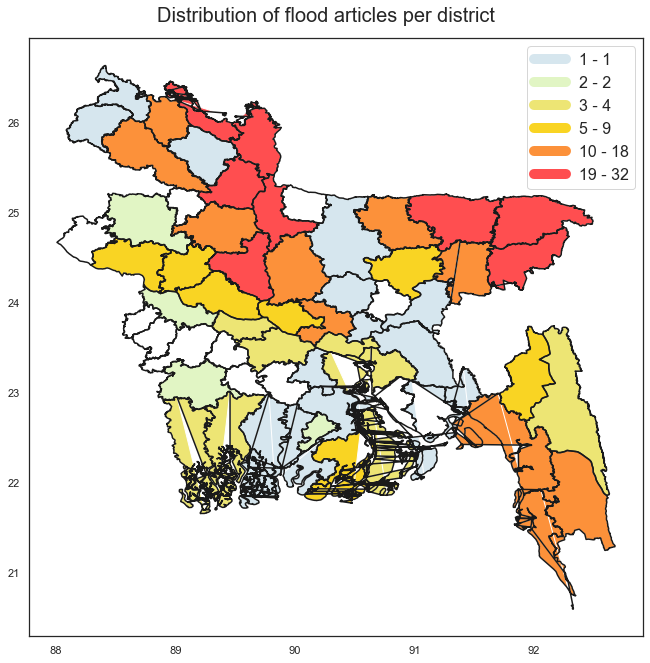

In [13]:
names = list(districtsNumDict2.keys())
data = list(districtsNumDict2.values())
print_id = False
color_pallete = 1
plot_cities_data(sf, "Distribution of flood articles per district", names, data, color_pallete, print_id)